In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
import helper



In [3]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


In [6]:
biased_dataset = helper.bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)

print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


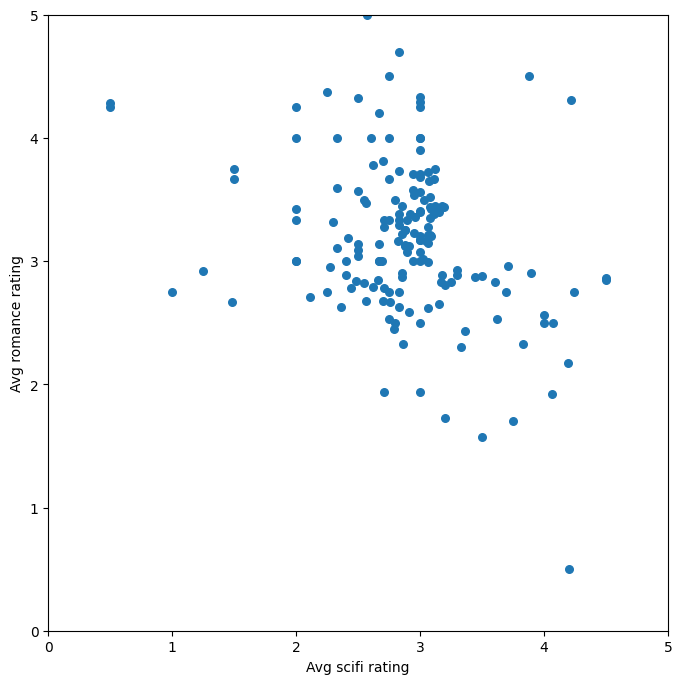

In [7]:
%matplotlib inline

helper.draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')


In [8]:
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values

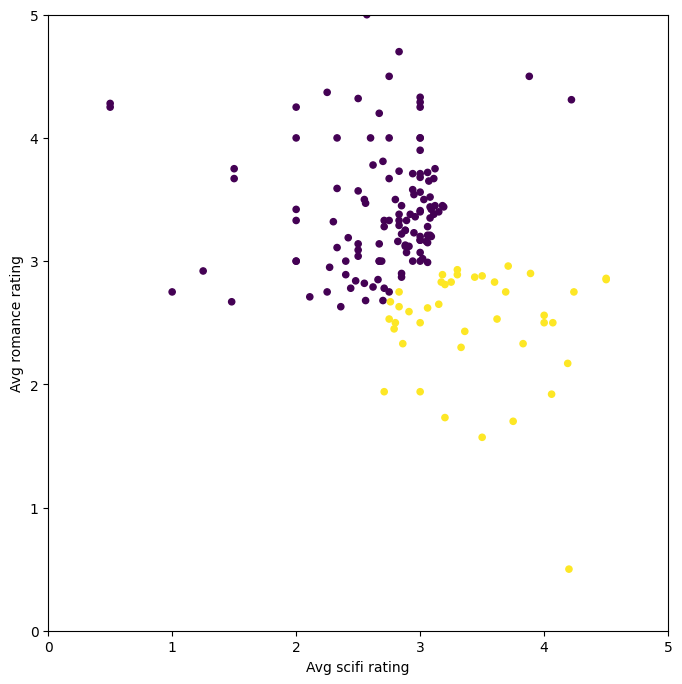

In [9]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=2, random_state=42)

predictions = kmeans_1.fit_predict(X)

helper.draw_clusters(biased_dataset, predictions)

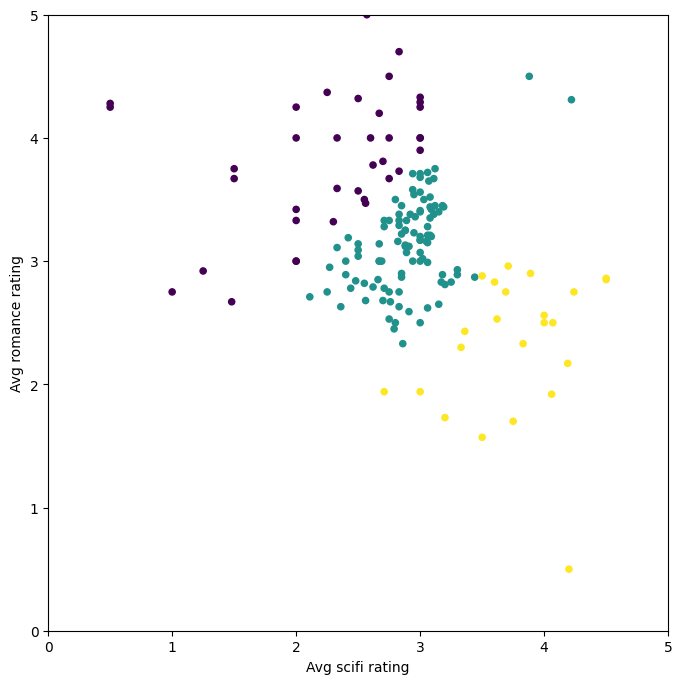

In [10]:

kmeans_2 = KMeans(n_clusters=3, random_state=42)

predictions_2 = kmeans_2.fit_predict(X)

helper.draw_clusters(biased_dataset, predictions_2)

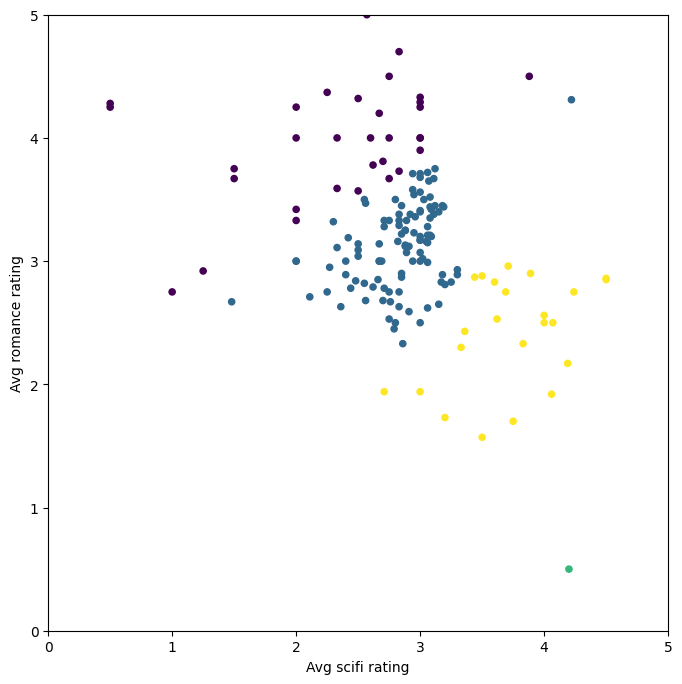

In [11]:
kmeans_3 = KMeans(n_clusters=4, random_state=42)

predictions_3 = kmeans_3.fit_predict(X)

helper.draw_clusters(biased_dataset, predictions_3)

In [12]:
possible_k_values = range(2, len(X)+1, 5)

errors_per_k = [helper.clustering_errors(k, X) for k in possible_k_values]

c:\Users\Maatheswaran\Desktop\python_portfolio\venv\Lib\site-packages\sklearn\base.py:1351: ConvergenceWarning: Number of distinct clusters (157) found smaller than n_clusters (162). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [13]:
list(zip(possible_k_values, errors_per_k))

[(2, 0.38451740263945056),
 (7, 0.3892370941590733),
 (12, 0.3641742791427933),
 (17, 0.3500681605094715),
 (22, 0.359474581151834),
 (27, 0.39559234254025577),
 (32, 0.4065608228147055),
 (37, 0.4080612816804387),
 (42, 0.40981373292157636),
 (47, 0.4070555171423174),
 (52, 0.38482851730325707),
 (57, 0.39971084056451234),
 (62, 0.398358705036145),
 (67, 0.40137822842181753),
 (72, 0.38294915827535225),
 (77, 0.3726772364955673),
 (82, 0.37029160764878266),
 (87, 0.34187337755041214),
 (92, 0.33531991779318726),
 (97, 0.32897572830326954),
 (102, 0.2860458358145671),
 (107, 0.2792082995840511),
 (112, 0.2576424162855061),
 (117, 0.2632030672519057),
 (122, 0.2336037104769106),
 (127, 0.22641432495244024),
 (132, 0.20734572546700974),
 (137, 0.19485533237237704),
 (142, 0.17030816046021022),
 (147, 0.14151810350027696),
 (152, 0.10678588096581217),
 (157, 0.06172839506172839),
 (162, 0.06172839506172839)]

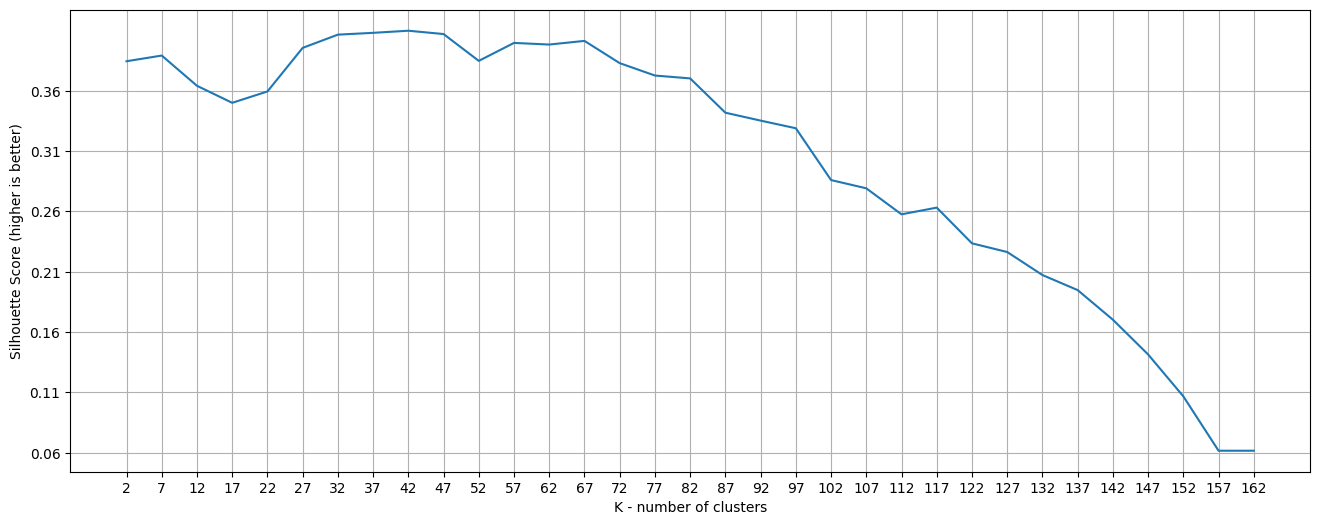

In [14]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k_values, errors_per_k)

xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

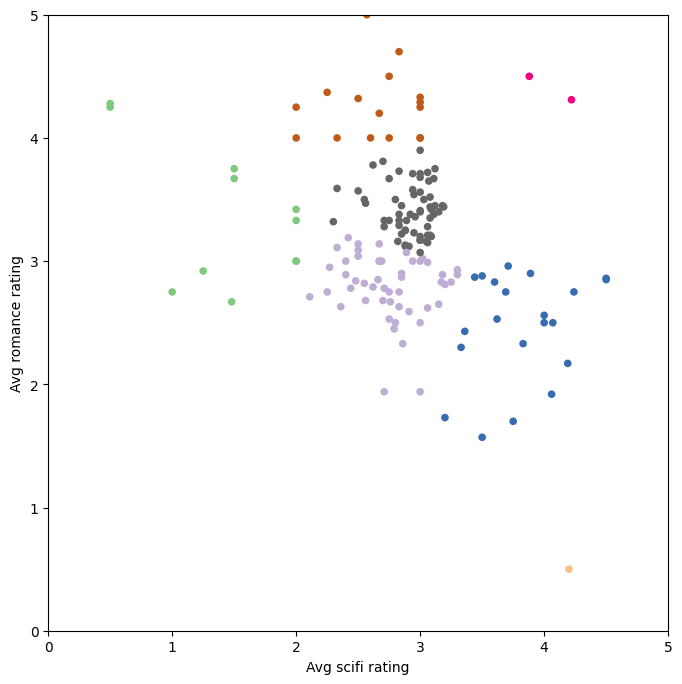

In [15]:
kmeans_4 = KMeans(n_clusters=7, random_state=42)
predictions_4 = kmeans_4.fit_predict(X)
helper.draw_clusters(biased_dataset, predictions_4, cmap='Accent')

In [16]:
biased_dataset_3_genres = helper.get_genre_ratings(ratings, movies, 
                                                     ['Romance', 'Sci-Fi', 'Action'], 
                                                     ['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
biased_dataset_3_genres = helper.bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()

print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  161


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,3,0.50,4.20,3.57
1,4,3.38,2.83,3.32
2,5,3.09,2.50,3.11
3,7,2.65,3.15,3.26
4,9,3.17,3.00,3.12


In [17]:
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',
                                         'avg_romance_rating', 
                                         'avg_action_rating']].values

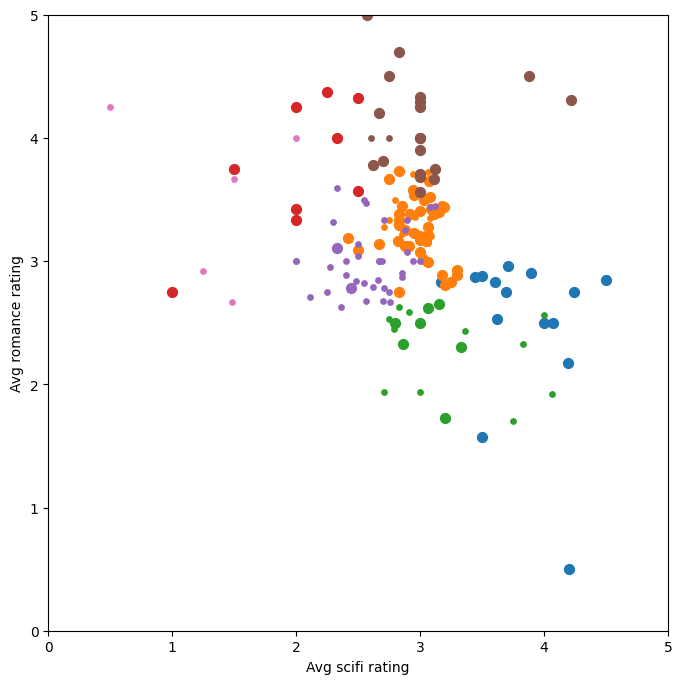

In [18]:

kmeans_5 = KMeans(n_clusters=7, random_state=42)

predictions_5 = kmeans_5.fit_predict(X_with_action)

helper.draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [19]:

ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
